<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Model_Tanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [4]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
base_dir = '/content/drive/My Drive/Capstone/'
!ls "/content/drive/My Drive/Capstone/"

Soil_Types  Training  Validation


In [7]:
soil_dir = os.path.join(base_dir, 'Soil_Types')
training_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')

In [8]:
yellow_dir = os.path.join(soil_dir, 'Tanah_Kuning/')
peat_dir = os.path.join(soil_dir, 'Tanah_Gambut/')
laterite_dir = os.path.join(soil_dir, 'Tanah_Laterit/')
cinder_dir = os.path.join(soil_dir, 'Tanah_Andosol/')
black_dir = os.path.join(soil_dir, 'Tanah_Vulkanik/')

print("Jumlah Data Train Tiap Kelas")
print("Jumlah gambar tanah kuning :", len(os.listdir(yellow_dir)))
print("Jumlah gambar tanah gambut :", len(os.listdir(peat_dir)))
print("Jumlah gambar tanah laterit :", len(os.listdir(laterite_dir)))
print("Jumlah gambar tanah andosol :", len(os.listdir(cinder_dir)))
print("Jumlah gambar tanah vulkanik :", len(os.listdir(black_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar tanah kuning : 30
Jumlah gambar tanah gambut : 30
Jumlah gambar tanah laterit : 30
Jumlah gambar tanah andosol : 30
Jumlah gambar tanah vulkanik : 40


In [9]:
#direktori training
train_yellow = os.path.join(training_dir, 'Tanah_Kuning/')
train_peat = os.path.join(training_dir, 'Tanah_Gambut/')
train_laterite = os.path.join(training_dir, 'Tanah_Laterit/')
train_cinder = os.path.join(training_dir, 'Tanah_Andosol/')
train_black = os.path.join(training_dir, 'Tanah_Vulkanik/')

#direktori validation
validation_yellow = os.path.join(validation_dir, 'Tanah_Kuning/')
validation_peat = os.path.join(validation_dir, 'Tanah_Gambut/')
validation_laterite = os.path.join(validation_dir, 'Tanah_Laterit/')
validation_cinder = os.path.join(validation_dir, 'Tanah_Andosol/')
validation_black = os.path.join(validation_dir, 'Tanah_Vulkanik/')

In [10]:
def split_data(soil_dir, training_dir, validation_dir, SPLIT_SIZE):
  files = []
  for filename in os.listdir(soil_dir):
    file = soil_dir + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = soil_dir + filename
    dest_file = training_dir + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = soil_dir + filename
    dest_file = validation_dir + filename
    copyfile(src_file, dest_file)
  pass


In [11]:
if len(os.listdir(train_yellow)) > 0:
  for file in os.scandir(train_yellow):
    os.remove(file.path)
if len(os.listdir(train_peat)) > 0:
  for file in os.scandir(train_peat):
    os.remove(file.path)
if len(os.listdir(train_laterite)) > 0:
  for file in os.scandir(train_laterite):
    os.remove(file.path)
if len(os.listdir(train_cinder)) > 0:
  for file in os.scandir(train_cinder):
    os.remove(file.path)
if len(os.listdir(train_black)) > 0:
  for file in os.scandir(train_black):
    os.remove(file.path)

if len(os.listdir(validation_yellow)) > 0:
  for file in os.scandir(validation_yellow):
    os.remove(file.path)
if len(os.listdir(validation_peat)) > 0:
  for file in os.scandir(validation_peat):
    os.remove(file.path)
if len(os.listdir(validation_laterite)) > 0:
  for file in os.scandir(validation_laterite):
    os.remove(file.path)
if len(os.listdir(validation_cinder)) > 0:
  for file in os.scandir(validation_cinder):
    os.remove(file.path)
if len(os.listdir(validation_black)) > 0:
  for file in os.scandir(validation_black):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(yellow_dir, train_yellow, validation_yellow, split_size)
split_data(peat_dir, train_peat, validation_peat, split_size)
split_data(laterite_dir, train_laterite, validation_laterite, split_size)
split_data(cinder_dir, train_cinder, validation_cinder, split_size)
split_data(black_dir, train_black, validation_black, split_size)


# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal yellow soil's directory has {len(os.listdir(yellow_dir))} images")
print(f"\n\nOriginal peat soil's directory has {len(os.listdir(peat_dir))} images")
print(f"\n\nOriginal laterite soil's directory has {len(os.listdir(laterite_dir))} images")
print(f"\n\nOriginal cinder soil's directory has {len(os.listdir(cinder_dir))} images")
print(f"\n\nOriginal black soil's directory has {len(os.listdir(black_dir))} images")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(train_yellow))} images of yellow soil for training")
print(f"There are {len(os.listdir(train_peat))} images of peat soil for training")
print(f"There are {len(os.listdir(train_laterite))} images of laterite soil for training")
print(f"There are {len(os.listdir(train_cinder))} images of cinder soil for training")
print(f"There are {len(os.listdir(train_black))} images of black soil for training")

print(f"There are {len(os.listdir(validation_yellow))} images of yellow soil for validation")
print(f"There are {len(os.listdir(validation_peat))} images of peat soil for validation")
print(f"There are {len(os.listdir(validation_laterite))} images of laterite soil for validation")
print(f"There are {len(os.listdir(validation_cinder))} images of cinder soil for validation")
print(f"There are {len(os.listdir(validation_black))} images of black soil for validation")



Original yellow soil's directory has 30 images


Original peat soil's directory has 30 images


Original laterite soil's directory has 30 images


Original cinder soil's directory has 30 images


Original black soil's directory has 40 images
There are 27 images of yellow soil for training
There are 27 images of peat soil for training
There are 27 images of laterite soil for training
There are 27 images of cinder soil for training
There are 36 images of black soil for training
There are 3 images of yellow soil for validation
There are 3 images of peat soil for validation
There are 3 images of laterite soil for validation
There are 3 images of cinder soil for validation
There are 4 images of black soil for validation


In [93]:
def train_val_generators(training_dir, validation_dir):

  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1.0/255.,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
 
  return train_generator, validation_generator

In [94]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 144 images belonging to 5 classes.
Found 16 images belonging to 5 classes.


In [95]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


In [96]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs = {}):
    if(logs.get('accuracy') > 0.91):
      print('Akurasi mencapai >90%')
      self.model.stop_training = True

callbacks = myCallback()      

In [119]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
  ])


In [120]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 17, 17, 64)     

In [121]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']) 

Train the model!


In [123]:
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator
                    )


Epoch 1/15
8/8 [==============================] - 2s 262ms/step - loss: 0.4056 - accuracy: 0.8333 - val_loss: 0.3159 - val_accuracy: 0.8750
Epoch 2/15
8/8 [==============================] - 2s 184ms/step - loss: 0.4152 - accuracy: 0.8264 - val_loss: 0.5700 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 1s 164ms/step - loss: 0.4358 - accuracy: 0.8403 - val_loss: 0.4979 - val_accuracy: 0.8125
Epoch 4/15
8/8 [==============================] - 1s 159ms/step - loss: 0.3824 - accuracy: 0.8542 - val_loss: 0.3562 - val_accuracy: 0.8125
Epoch 5/15
8/8 [==============================] - 1s 171ms/step - loss: 0.4054 - accuracy: 0.8056 - val_loss: 0.6449 - val_accuracy: 0.6875
Epoch 6/15
8/8 [==============================] - 1s 155ms/step - loss: 0.5192 - accuracy: 0.7847 - val_loss: 0.2684 - val_accuracy: 0.9375
Epoch 7/15
8/8 [==============================] - 1s 155ms/step - loss: 0.5184 - accuracy: 0.7778 - val_loss: 0.4118 - val_accuracy: 0.8125
Epoch 8/15
8/8 [====

In [130]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
    
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved model to disk


Transfer learning model evaluation

In [ ]:
#valid_loss, valid_accuracy = model.evaluate(validation_generator)
#print("Accuracy after transfer learning: {}".format(valid_accuracy))

2/2 [==============================] - 0s 50ms/step - loss: 0.5161 - accuracy: 0.8750
Accuracy after transfer learning: 0.875


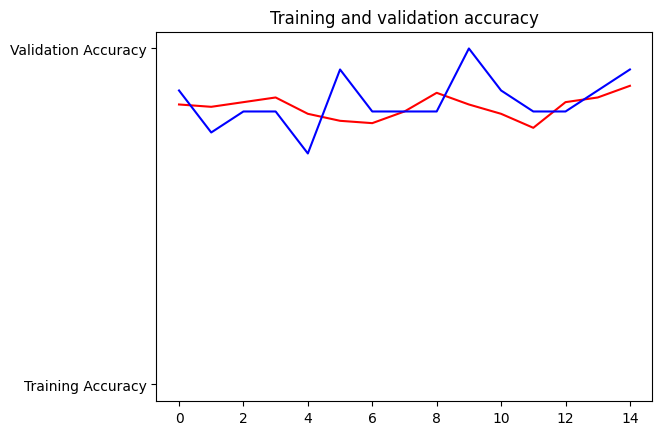

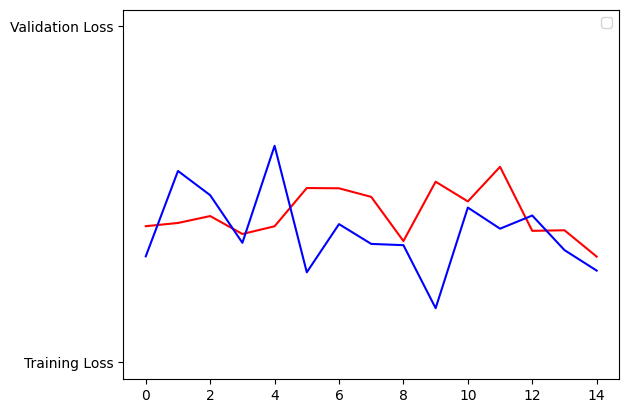

In [125]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend()
plt.show()

In [126]:
from tensorflow.keras.models import Sequential, model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [127]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving TanahAndosol1.jpg to TanahAndosol1.jpg
1/1 [==============================] - 0s 102ms/step
TanahAndosol1.jpg
[[1. 0. 0. 0. 0.]]


In [ ]:
#from keras.models import load_model
#from keras.preprocessing import image
#import keras.utils as image
#import matplotlib.pyplot as plt
#from google.colab import files
#from tensorflow.keras.utils import load_img, img_to_array
#import numpy as np
#import os
#import cv2


#def load_image(img_path, show=False):

    #img = image.load_img(img_path, target_size=(150, 150))
    #img_tensor = image.img_to_array(img)                    # (height, width, channels)
    #img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    #img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    #if show:
        #plt.imshow(img_tensor[0])                           
        #plt.axis('off')
        #plt.show()

    #return img_tensor


#img_width, img_height = 150, 150
#img = image.load_img('/content/drive/MyDrive/Capstone/Validation/Tanah_Vulkanik/18.jpg', target_size = (img_width, img_height))
#img = image.img_to_array(img)
#img = np.expand_dims(img, axis = 0)

#predict = loaded_model.predict(img)
#print (predict)

# Mendapatkan indeks maksimum dari hasil prediksi
#predicted_label_index = np.argmax(predict)

# Daftar label yang sesuai dengan indeks prediksi
#labels = ['Tanah_Andosol', 'Tanah_Gambut', 'Tanah_Kuning','Tanah_Laterit', 'Tanah_Vulkanik']

# Mendapatkan label prediksi
#predicted_label = labels[predicted_label_index]

#print(predicted_label)

# **Test Model**

1/1 [==============================] - 0s 208ms/step


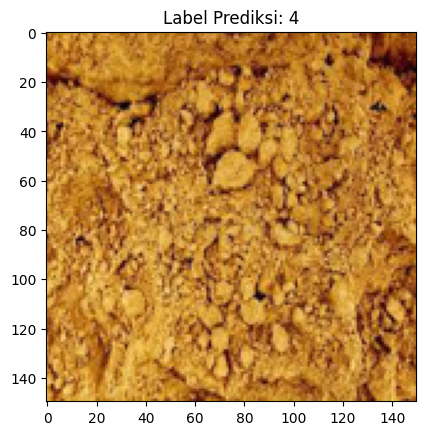

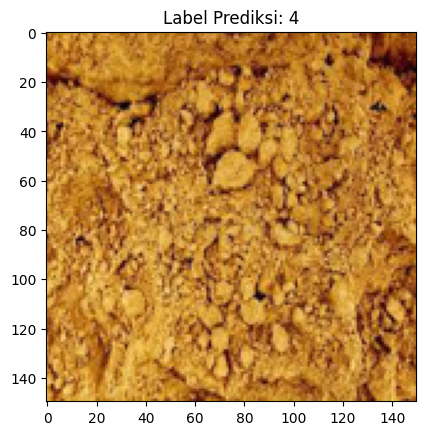

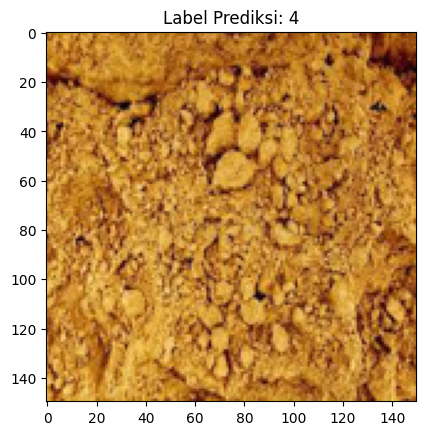

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Tentukan path folder validasi
validation_dir2 = '/content/drive/MyDrive/Capstone/Validation/Yellow_Soil'

# Inisialisasi list untuk menyimpan data uji dan label
validation_data = []
validation_label = []

# Baca setiap gambar dalam folder validasi
for filename in os.listdir(validation_dir2):
    if filename.endswith(".jpg"):
        path = os.path.join(validation_dir2, filename)
        img = Image.open(path)# Buka img menggunakan PIL
        img = img.resize((150, 150))         # Ubah ukuran img menjadi 150x150
        array_img = np.array(img)
        validation_data.append(array_img)
        validation_label.append(None)

validation_data = np.array(validation_data)
prediksi = model.predict(validation_data)

predict_label = np.argmax(prediksi, axis=1)

# Dapatkan output gambar untuk setiap prediksi
img_dir = '/content/drive/MyDrive/Capstone/Validation'  # Ubah dengan jalur folder gambar yang sesuai
for i in range(len(predict_label)):
    # Konversi array gambar ke objek PIL Image
    gambar = Image.fromarray(validation_data[i])
    
    # Tampilkan gambar dan label prediksi menggunakan matplotlib
    plt.imshow(img)
    plt.title('Label Prediksi: {}'.format(predict_label[i]))
    plt.show()